In [77]:
import skimage
from skimage import data
import matplotlib.pyplot as plt

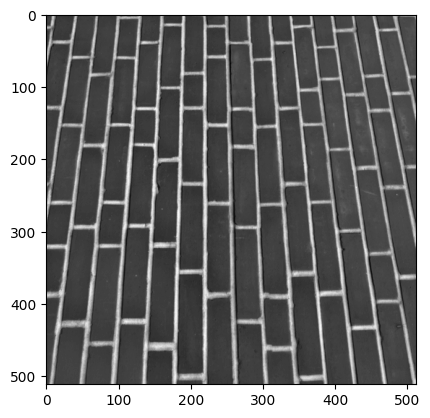

In [78]:
I= skimage.data.brick()
plt.imshow(I,"gray")
plt.show()

In [79]:
def DoG(I, sigma_1, k):
    G1 = skimage.filters.gaussian(I, sigma=sigma_1)
    G2 = skimage.filters.gaussian(I, sigma=k*sigma_1)
    DoG = G1 - G2
    return plt.imshow( DoG, 'gray')


In [80]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

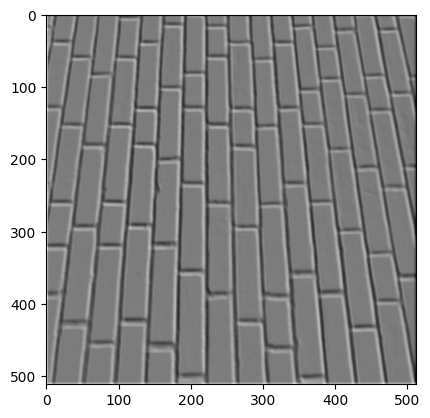

In [81]:
k=3
s=3
x=np.arange(-k,k+1)
[i,j]=np.meshgrid(x,x)
h= -1/((np.pi*(s**4)))*((1-(i-(k+1))**2 + (j-(k+1))**2)/(2*(s**2))) * np.exp(-((i-(k+1))**2 + (j-(k+1))**2)/(2*(s**2)))
I_lapgaus= convolve2d(I , h, mode='same')
plt.imshow(I_lapgaus,'gray')

In [82]:
import numpy as np
from scipy.signal import convolve2d

In [83]:
def kernel_log(sigma, k):
    x, y = np.meshgrid(np.arange(-k//2+1, k//2+1), np.arange(-k//2+1, k//2+1))
    h = (-1/(np.pi*sigma**4)) * (1 - (x**2 + y**2)/(2*sigma**2)) * np.exp(-(x**2 + y**2)/(2*sigma**2))
    h = h - np.mean(h)
    h = h / np.sum(np.abs(h))
    return h

In [84]:
def LoG(I, sigma=3, k=15):
    k = 2 * k + 1
    h = kernel_log(sigma, k)
    filtered = convolve2d(I, h)
    return filtered

In [85]:
import matplotlib.pyplot as plt

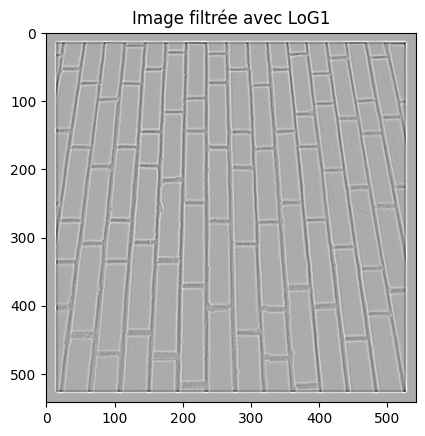

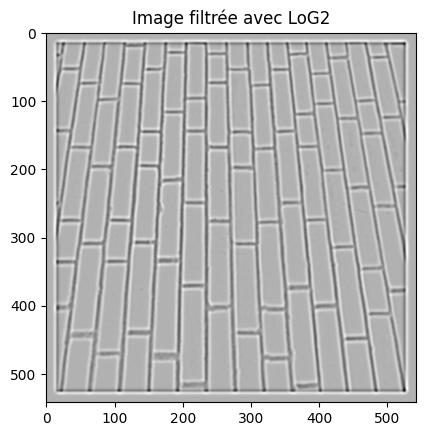

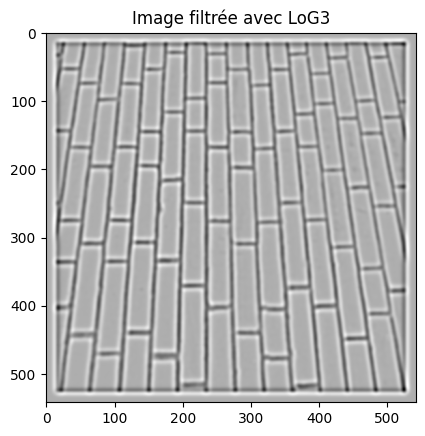

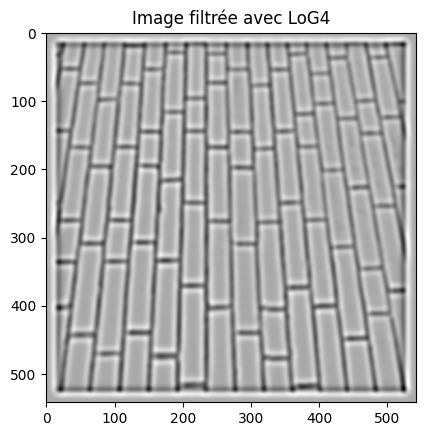

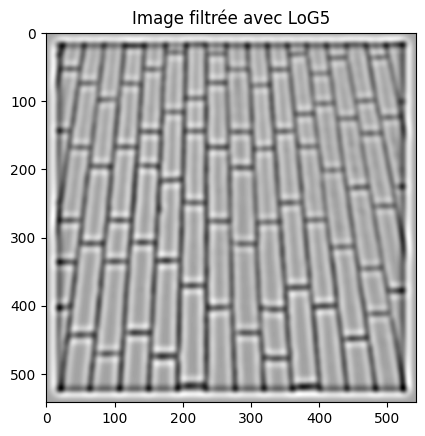

In [86]:
for i in range(1, 6):
    filtered = LoG(I, sigma=i, k=15)
    plt.imshow(filtered,'gray')
    plt.title('Image filtrée avec LoG'+str(i))
    plt.show()